# Face Alignment 

In this task, you have to implement face normalization and alignment. Most of the face images deceptively seem to be aligned, but since many face recognition algorithms are very sensitive to shifts and rotations, we need not only to find a face on the image but also normalize it. Besides, the neural networks usually used for recognition have fixed input size, so, the normalized face images should be resized as well.

There are six images of faces you have to normalize. In addition, you have the coordinates of the eyes in each of the pictures. You have to rotate the image so that the eyes are on the same height, crop the square box containing the face and transform it to the size 224×224.

The eyes should be located symmetrically and in the middle of the image (on the height).

Here is an example of how the transformation should look like.

### Get data¶

You get the images and corresponding eyes coordinates for each person. You should implement the function 𝚕𝚘𝚊𝚍
_𝚏𝚊𝚌𝚎𝚜_𝚊𝚗𝚍_𝚎𝚢𝚎𝚜 that reads the data and returns two dictionaries: the dictionary of images and the dictionary of eyes coordinates. Eyes coordinates is a list of two tuples [(𝑥1,𝑦1),(𝑥2,𝑦2)]

. Both dictionaries should have filenames as the keys.

𝚍𝚒𝚛
_𝚗𝚊𝚖𝚎 is the path to the directory with face images, 𝚎𝚢𝚎_𝚙𝚊𝚝𝚑 is the path to .pickle file with eyes coordinates. If these directory and file are located in the same directory as this notebook, then default arguments can be used.

In [18]:
import pickle
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [11]:
def load_faces_and_eyes(dir_name = 'faces_imgs', eye_path = './eyes.pickle'):
    faces={}
    for filename in os.listdir(dir_name):
        img = cv2.cvtColor(cv2.imread(os.path.join(dir_name,filename)), cv2.COLOR_BGR2RGB)
        if img is not None:
            faces[filename] = img
    pickle_in = open(eye_path,"rb")
    eyes = pickle.load(pickle_in)
    return faces,eyes
    
    
faces, eyes = load_faces_and_eyes()

In [12]:
def visualize(imgs, format=None):
    plt.figure(figsize=(20, 37))
    for i, img in enumerate(imgs):
#         if img.shape[0] == 3:
#             img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 3, plt_idx)    
        plt.imshow(img, cmap=format)
    plt.show()

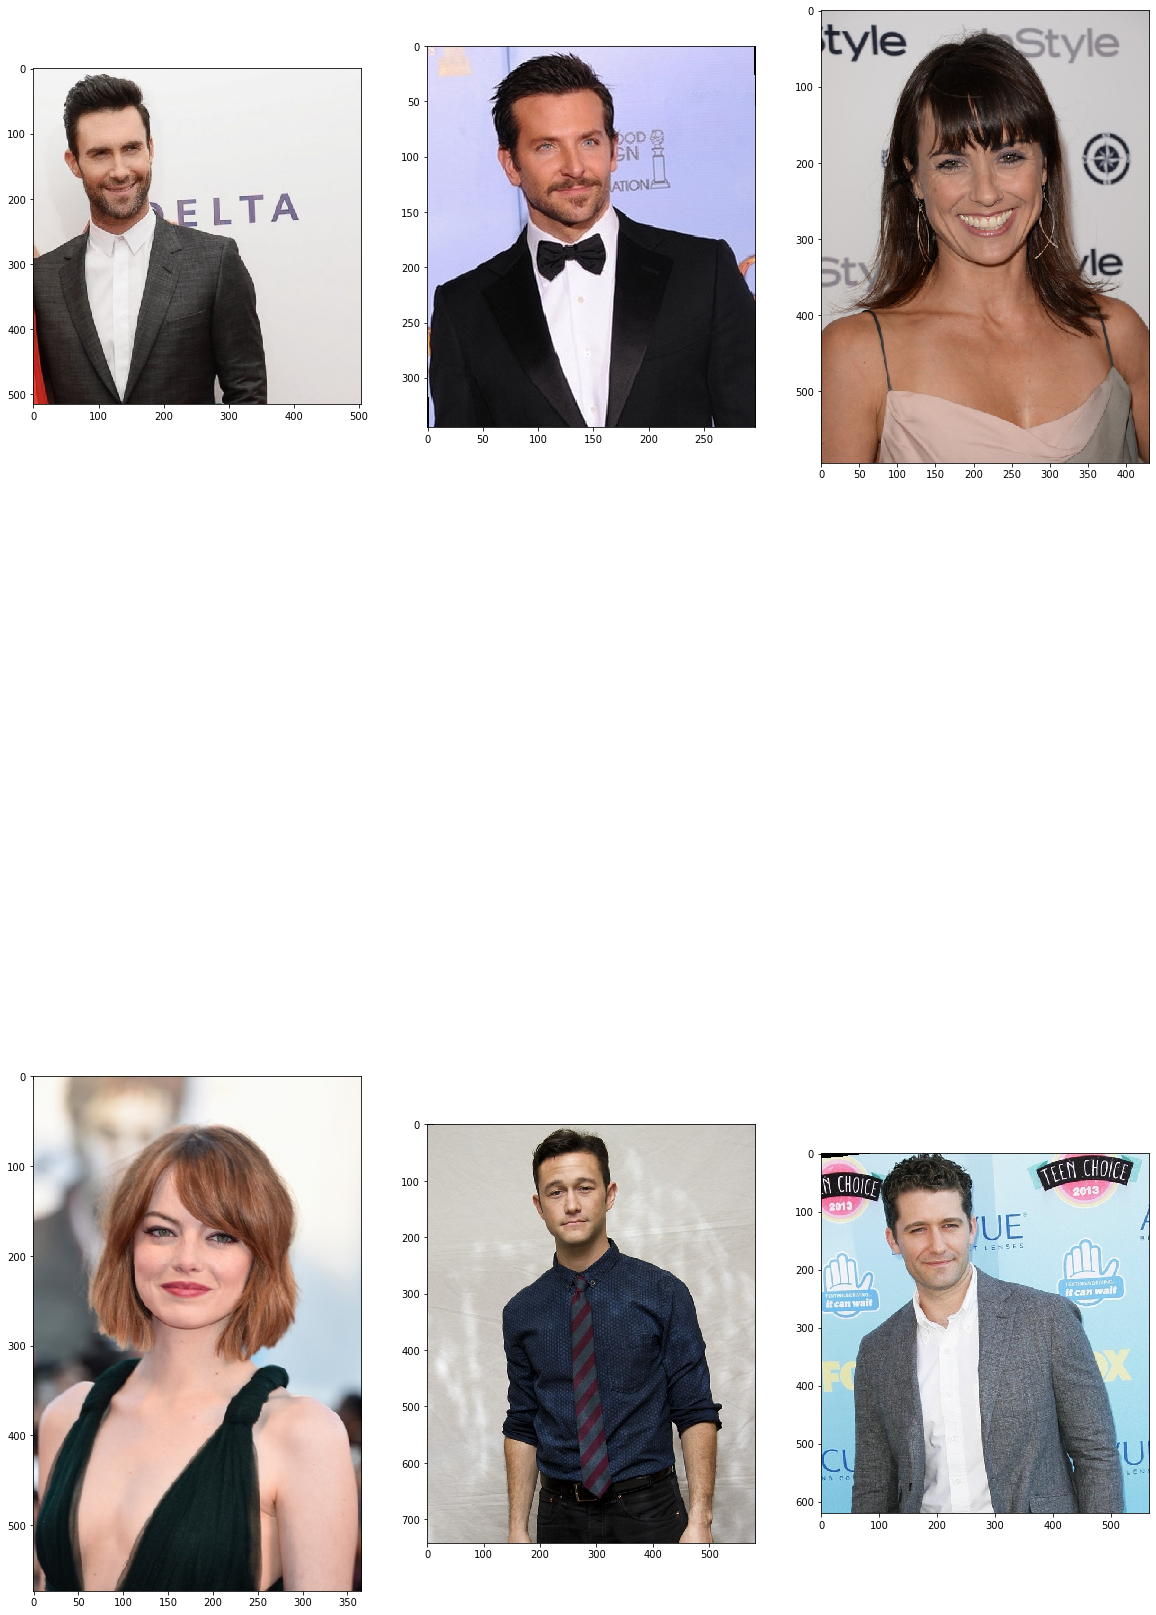

In [13]:
visualize(faces.values())

In [14]:
import skimage.transform
#################################################################
# TODO: implement the function transform_face that rotates      #
#       the image so that the eyes have equal ordinate,         #
#       crops the square box containing face and resizes it.    #
#       You can use methods from skimage library if you need.   #
#       (2.5 points)                                              #
#################################################################

def transform_face(image, eyes):
    """ Your implementation """ 
    eye0 = np.array(eyes[0])
    eye1 = np.array(eyes[1])
    dist = np.sqrt(np.sum((eye1 - eye0))**2)
    diff = eye1 - eye0
    angle = np.arctan(diff[1]/diff[0])
    
    org_eye_center = (eye0 + eye1)/2
    rot_img = ndimage.rotate(image, np.rad2deg(angle)) 
    org_img_center = (np.array(image.shape[:2][::-1]) - 1)/2.
    rot_img_center = (np.array(rot_img.shape[:2][::-1]) - 1)/2.
    org_pos = org_eye_center - org_img_center
    new_pos = np.array([org_pos[0]*np.cos(angle) + org_pos[1]*np.sin(angle),
            -org_pos[0]*np.sin(angle) + org_pos[1]*np.cos(angle) ])
    new_center = new_pos + rot_img_center
    
    mid_x, mid_y = new_center

    MUL = 2.3
    top = int(max(mid_y - MUL*dist, 0))
    bottom = int(min(mid_y + MUL*dist, rot_img.shape[0]))
    left = int(max(mid_x - MUL*dist, 0))
    right = int(min(mid_x + MUL*dist, rot_img.shape[1]))
    cropped = rot_img[top:bottom, left:right]
    transformed = skimage.transform.resize(cropped, [224, 224], mode='constant')
    
    return transformed

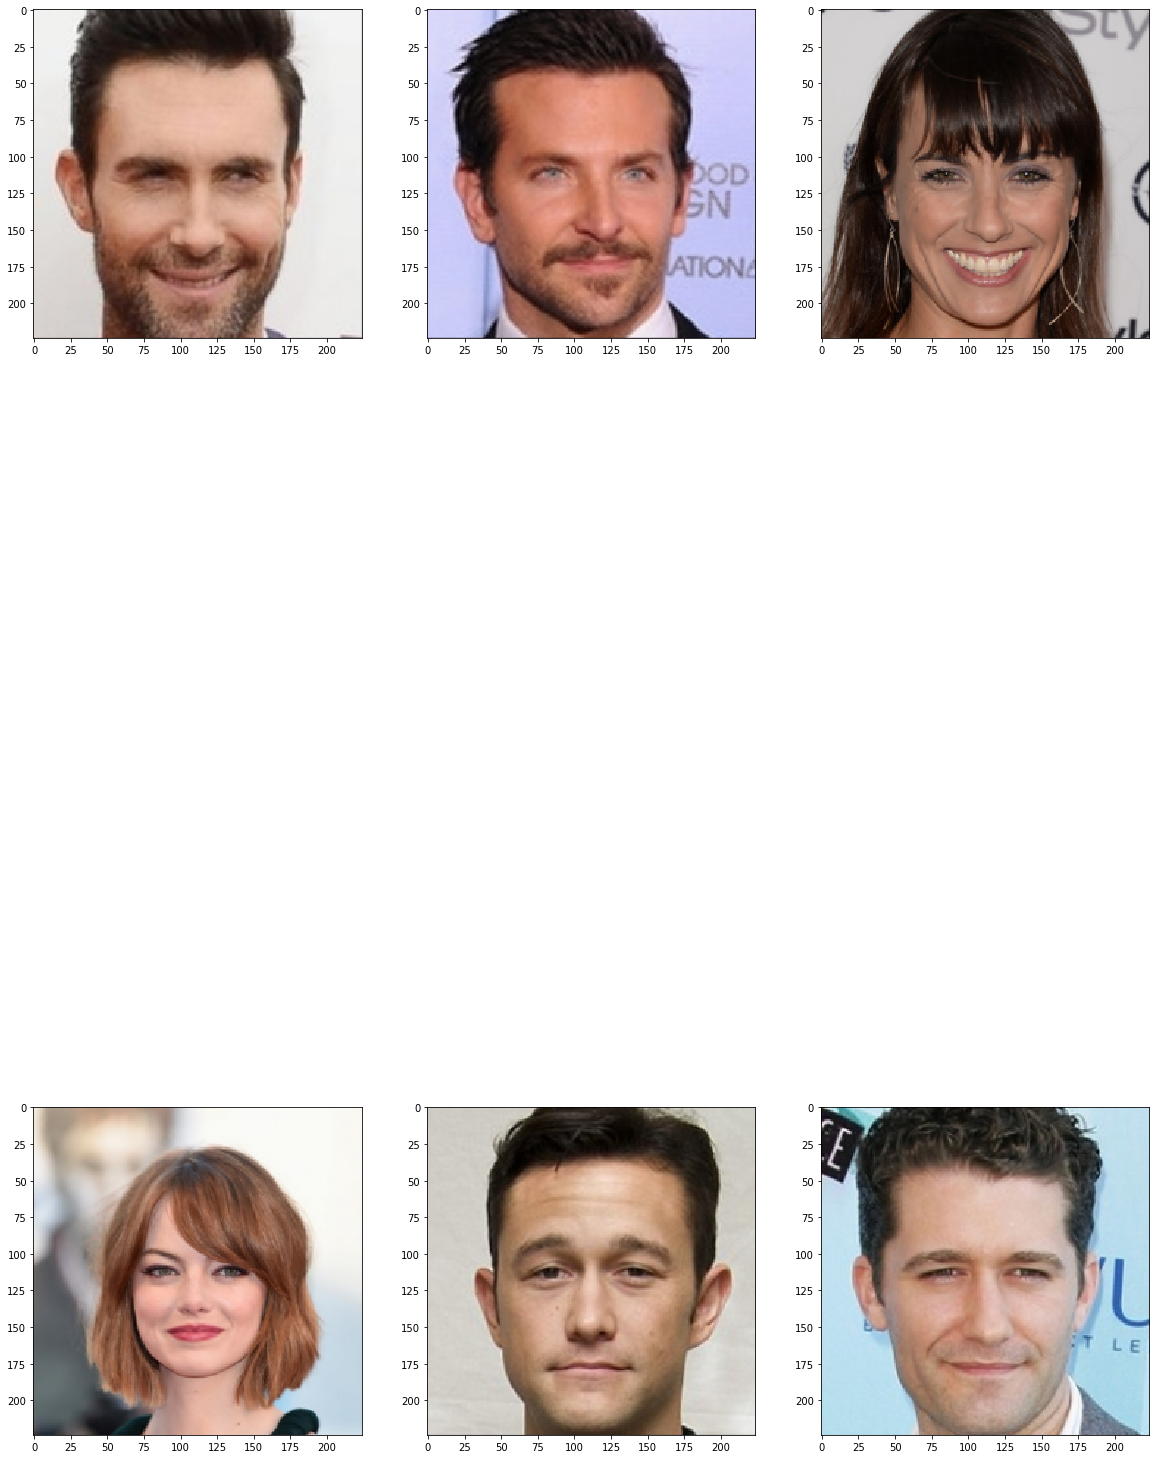

In [19]:
transformed_imgs = []
for i in faces:
    img = faces[i]
    eye = eyes[i]
    transformed = transform_face(img, eye)
    transformed_imgs.append(transformed)
    
visualize(transformed_imgs)